# 1.4.4 Smoothing Images

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 2D Convolution (Image Filtering)

In [29]:
img = cv2.imread('1000.png')
kernel = np.ones((5,5),np.float32)/25

In [30]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

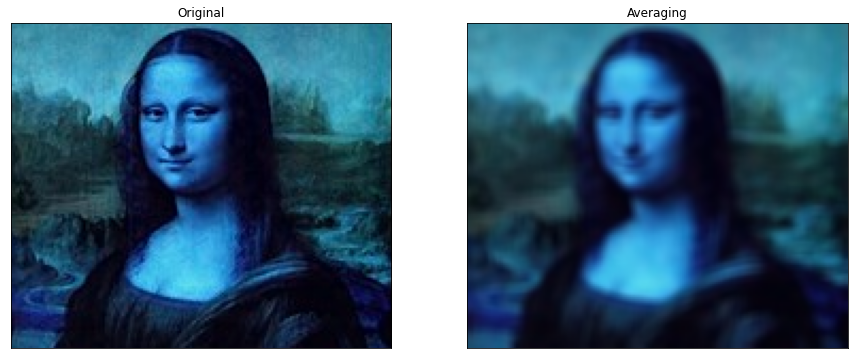

In [31]:
dst = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Blurring (Image Smoothing)

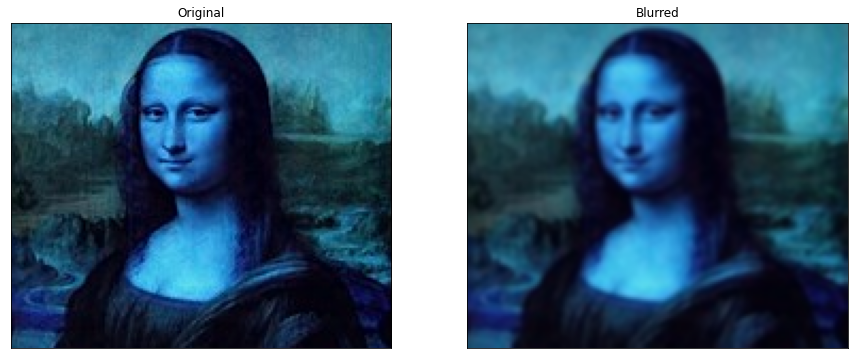

In [32]:
#blur = cv2.blur(img,(5,5))
blur = cv2.GaussianBlur(img,(5,5),0)
#blur = cv2.medianBlur(img,5)
#blur = cv2.bilateralFilter(img,9,75,75)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Kernel Convolution

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [34]:
l=1
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],np.float32)

In [35]:
kernel

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [36]:
img = np.random.randint(10, size=(12,12))
#img = np.ones((10,10),np.float32)

In [37]:
img

array([[1, 4, 4, 7, 4, 3, 9, 7, 6, 5, 1, 6],
       [5, 1, 5, 7, 3, 6, 3, 6, 2, 7, 6, 0],
       [5, 4, 4, 6, 1, 4, 7, 3, 2, 5, 5, 9],
       [5, 6, 2, 2, 7, 1, 7, 1, 6, 9, 7, 8],
       [0, 1, 5, 6, 8, 0, 6, 9, 6, 4, 8, 6],
       [3, 7, 3, 6, 4, 5, 3, 0, 6, 6, 6, 7],
       [0, 0, 0, 1, 3, 7, 3, 6, 1, 4, 8, 7],
       [9, 1, 3, 6, 0, 8, 3, 4, 8, 8, 1, 2],
       [7, 9, 3, 6, 1, 4, 1, 4, 2, 6, 4, 3],
       [7, 3, 7, 6, 0, 1, 5, 8, 1, 6, 3, 9],
       [5, 9, 3, 6, 3, 0, 1, 4, 7, 1, 8, 5],
       [7, 1, 2, 5, 7, 5, 4, 2, 4, 2, 1, 6]])

In [38]:
h,w=img.shape

In [39]:
print(h,w)

12 12


In [40]:
#[*range(-2,3)]

In [41]:
dst = np.zeros((h,w),np.int)

In [42]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i,j]=t        

In [43]:
img

array([[1, 4, 4, 7, 4, 3, 9, 7, 6, 5, 1, 6],
       [5, 1, 5, 7, 3, 6, 3, 6, 2, 7, 6, 0],
       [5, 4, 4, 6, 1, 4, 7, 3, 2, 5, 5, 9],
       [5, 6, 2, 2, 7, 1, 7, 1, 6, 9, 7, 8],
       [0, 1, 5, 6, 8, 0, 6, 9, 6, 4, 8, 6],
       [3, 7, 3, 6, 4, 5, 3, 0, 6, 6, 6, 7],
       [0, 0, 0, 1, 3, 7, 3, 6, 1, 4, 8, 7],
       [9, 1, 3, 6, 0, 8, 3, 4, 8, 8, 1, 2],
       [7, 9, 3, 6, 1, 4, 1, 4, 2, 6, 4, 3],
       [7, 3, 7, 6, 0, 1, 5, 8, 1, 6, 3, 9],
       [5, 9, 3, 6, 3, 0, 1, 4, 7, 1, 8, 5],
       [7, 1, 2, 5, 7, 5, 4, 2, 4, 2, 1, 6]])

In [44]:
dst

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, -14,   4,   7,  -6,  11, -16,   9, -13,  10,  11,   0],
       [  0,   0,  -1,  10, -16,   1,  11,  -4,  -8,  -3,  -7,   0],
       [  0,  12,  -9, -13,  16, -14,  13, -21,   6,  14,  -2,   0],
       [  0, -14,   8,   3,  15, -20,   5,  23,  -1, -13,   9,   0],
       [  0,  21,  -6,  10,  -6,   6,  -2, -24,  11,   4,  -5,   0],
       [  0,  -8,  -7, -11,   0,   9,  -7,  16, -20,  -7,  14,   0],
       [  0, -17,   2,  14, -18,  18,  -4,  -5,  17,  13, -18,   0],
       [  0,  22, -13,   8,  -6,   5, -12,   1, -11,   4,   3,   0],
       [  0, -20,  13,   5, -11,  -5,   9,  18, -19,  13, -15,   0],
       [  0,  24, -12,   7,  -1, -10,  -9,  -2,  18, -19,  22,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [45]:
img = cv2.imread('lena.png', 0)

In [46]:
h,w=img.shape

In [47]:
dst = np.zeros((h-2*l,w-2*l),np.uint8)

In [48]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i-l,j-l]=t 

In [50]:
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()